## Camada Bronze - Polícia Rodoviária Federal (PRF)

Os dados foram obtidos através da plataforma [Kaggle](https://www.kaggle.com/datasets/alinebertolani/federal-highway-accidents-dataset). A [fonte original](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf) dos dados é a Polícia Rodoviária Federal (PRF) do Brasil, que coleta informações detalhadas sobre acidentes de trânsito nas rodovias federais do país.

## Descrição do Dataset

Cada registro no dataset representa uma pessoa envolvida em um acidente de trânsito nas rodovias federais brasileiras. O dataset contém diversas colunas que fornecem informações sobre o acidente, a vítima e as circunstâncias do evento.

O significado das colunas do dataset podem ser encontrados no [dicionário de dados](./dicionario_de_dados.pdf).

## Análise Exploratória dos Dados Brutos

Nesta seção, utilizaremos Python e suas bibliotecas especializadas para realizar uma análise exploratória completa do dataset.

## 1. Importação das Bibliotecas Necessárias

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from pathlib import Path
import re

warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

## 2. Definição de variáveis globais e funções auxiliares 

In [18]:
RAW_PATH = Path('.') 
RAW_FILES = sorted([p for p in RAW_PATH.iterdir() if p.suffix.lower() == ".csv"])

## 3. Leitura e Consolidação dos Dados Brutos

In [19]:
dataframes = []
for file in RAW_FILES:
    df_year = pd.read_csv(file, dtype='string', low_memory=False, encoding='latin1', sep=';')
    dataframes.append(df_year)

df = pd.concat(dataframes, ignore_index=True)
df['mortos'] = pd.to_numeric(df['mortos'], errors='coerce').fillna(0).astype(int)
df['feridos_graves'] = pd.to_numeric(df['feridos_graves'], errors='coerce').fillna(0).astype(int)
df['feridos_leves'] = pd.to_numeric(df['feridos_leves'], errors='coerce').fillna(0).astype(int)
df['ilesos'] = pd.to_numeric(df['ilesos'], errors='coerce').fillna(0).astype(int)
df['data_dt'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d', errors='coerce')
df['ano'] = df['data_dt'].dt.year
df['mes'] = df['data_dt'].dt.month
df['ano_mes'] = df['data_dt'].dt.to_period('M')

print(f'Dataset consolidado: {len(df):,} registros | {len(df.columns)} colunas')

Dataset consolidado: 1,131,595 registros | 41 colunas


## 4. Visão Geral do Dataset

Examinamos de maneira breve o DataFrame utilizado:

In [20]:
df.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,mortos,latitude,longitude,regional,delegacia,uop,data_dt,ano,mes,ano_mes
0,571772,1268971,2024-01-01,segunda-feira,00:05:00,RJ,101,"272,5",TANGUA,Sim,...,1,-22.72935968,-42.70112512,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ,2024-01-01,2024,1,2024-01
1,571774,1268985,2024-01-01,segunda-feira,00:05:00,GO,153,"424,6",ANAPOLIS,Não,...,0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO,2024-01-01,2024,1,2024-01
2,571774,1268985,2024-01-01,segunda-feira,00:05:00,GO,153,"424,6",ANAPOLIS,Sim,...,0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO,2024-01-01,2024,1,2024-01
3,571777,1269020,2024-01-01,segunda-feira,01:45:00,ES,101,"264,1",SERRA,Sim,...,0,-20.17292791,-40.26736384,SPRF-ES,DEL02-ES,UOP01-DEL02-ES,2024-01-01,2024,1,2024-01
4,571778,1269028,2024-01-01,segunda-feira,00:45:00,SC,101,110,PENHA,Não,...,0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,2024-01-01,2024,1,2024-01
5,571778,1269045,2024-01-01,segunda-feira,00:45:00,SC,101,110,PENHA,Não,...,0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,2024-01-01,2024,1,2024-01
6,571778,1269028,2024-01-01,segunda-feira,00:45:00,SC,101,110,PENHA,Sim,...,0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,2024-01-01,2024,1,2024-01
7,571778,1269045,2024-01-01,segunda-feira,00:45:00,SC,101,110,PENHA,Sim,...,0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC,2024-01-01,2024,1,2024-01
8,571779,1268998,2024-01-01,segunda-feira,01:45:00,RS,116,236,NOVO HAMBURGO,Sim,...,0,-29.66938502,-51.14304731,SPRF-RS,DEL01-RS,UOP02-DEL01-RS,2024-01-01,2024,1,2024-01
9,571779,1268999,2024-01-01,segunda-feira,01:45:00,RS,116,236,NOVO HAMBURGO,Sim,...,0,-29.66938502,-51.14304731,SPRF-RS,DEL01-RS,UOP02-DEL01-RS,2024-01-01,2024,1,2024-01


## 4. Geração de Estatísticas Descritivas

### Análise 1: Evolução Temporal - Comparativo entre os anos disponíveis

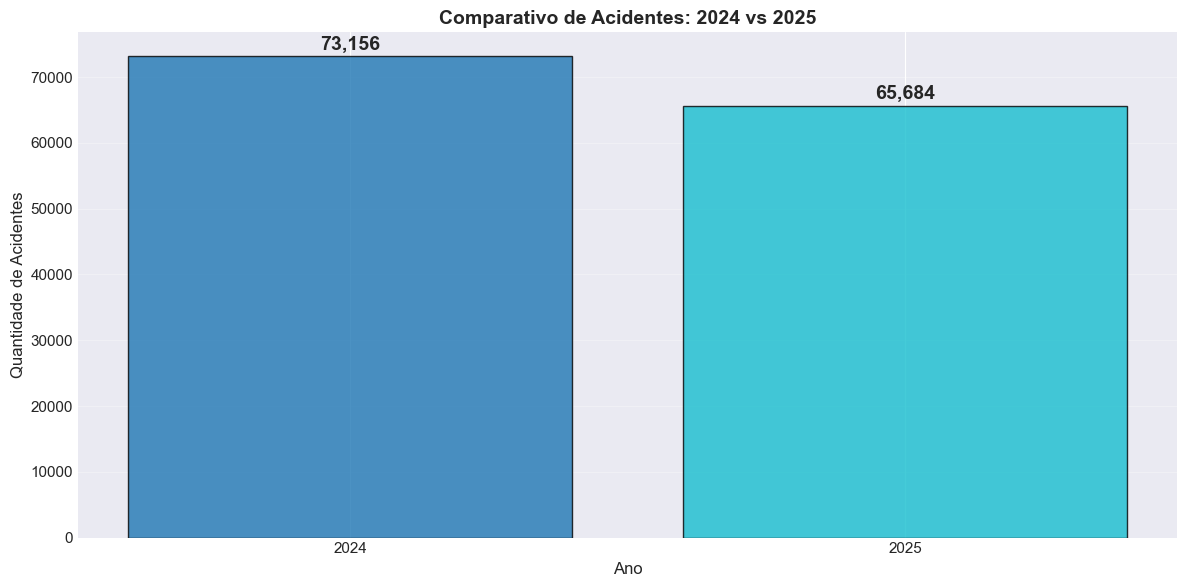

2024: 73,156 | 2025: 65,684 | Variação: -10.2%


In [21]:

acidentes_ano = df.groupby('ano')['id'].nunique().sort_index()

# Obter anos disponíveis dinamicamente
anos_disponiveis = acidentes_ano.index.dropna().astype(int).tolist()
primeiro_ano = min(anos_disponiveis)
ultimo_ano = max(anos_disponiveis)

fig, ax = plt.subplots(figsize=(12, 6))
# Gerar cores dinamicamente baseado na quantidade de anos
cores = plt.cm.tab10(np.linspace(0, 1, len(anos_disponiveis)))
bars = ax.bar(acidentes_ano.index.astype(str), acidentes_ano.values, 
              color=cores, alpha=0.8, edgecolor='black')

for i, (ano, valor) in enumerate(acidentes_ano.items()):
    ax.text(i, valor + 1000, f'{valor:,}', ha='center', fontweight='bold', fontsize=14)

titulo = f'Comparativo de Acidentes: {primeiro_ano} vs {ultimo_ano}' if len(anos_disponiveis) == 2 else f'Acidentes por Ano ({primeiro_ano}-{ultimo_ano})'
ax.set_title(titulo, fontsize=14, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade de Acidentes', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calcular variação entre o primeiro e último ano
if len(anos_disponiveis) >= 2:
    valor_primeiro = acidentes_ano[primeiro_ano]
    valor_ultimo = acidentes_ano[ultimo_ano]
    variacao = ((valor_ultimo - valor_primeiro) / valor_primeiro) * 100
    print(f"{primeiro_ano}: {valor_primeiro:,} | {ultimo_ano}: {valor_ultimo:,} | Variação: {variacao:+.1f}%")
else:
    print(f"Apenas um ano disponível: {primeiro_ano} com {acidentes_ano[primeiro_ano]:,} acidentes")

### Análise 2: Evolução Mensal - Comparativo entre os meses dos anos disponíveis

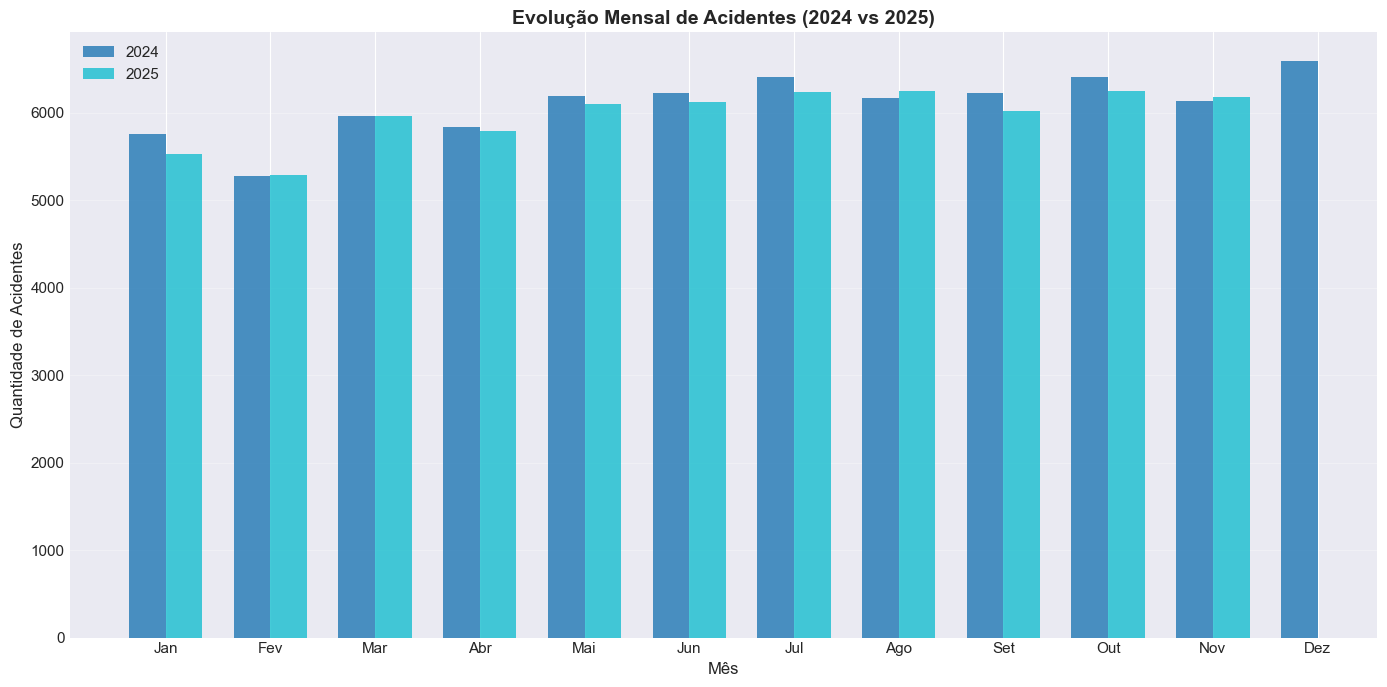

In [22]:
acidentes_mes = df.groupby(['ano', 'mes'])['id'].nunique().unstack(level=0)

# Obter anos disponíveis dinamicamente
anos_disponiveis = sorted([col for col in acidentes_mes.columns if pd.notna(col)])
primeiro_ano = min(anos_disponiveis)
ultimo_ano = max(anos_disponiveis)

fig, ax = plt.subplots(figsize=(14, 7))
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
x = np.arange(len(meses))
width = 0.35 if len(anos_disponiveis) == 2 else 0.8 / len(anos_disponiveis)

# Gerar cores dinamicamente
cores = plt.cm.tab10(np.linspace(0, 1, len(anos_disponiveis)))

# Plotar barras para cada ano disponível
for idx, ano in enumerate(anos_disponiveis):
    valores = [acidentes_mes[ano].get(i, 0) for i in range(1, 13)]
    offset = (idx - len(anos_disponiveis)/2 + 0.5) * width if len(anos_disponiveis) > 1 else 0
    ax.bar(x + offset, valores, width, label=str(ano), color=cores[idx], alpha=0.8)

ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Quantidade de Acidentes', fontsize=12)
titulo = f'Evolução Mensal de Acidentes ({primeiro_ano} vs {ultimo_ano})' if len(anos_disponiveis) == 2 else f'Evolução Mensal de Acidentes ({primeiro_ano}-{ultimo_ano})'
ax.set_title(titulo, fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(meses)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Análise 3: Distribuição Geográfica - Comparativo entre as Unidades Federativas (UFs) 

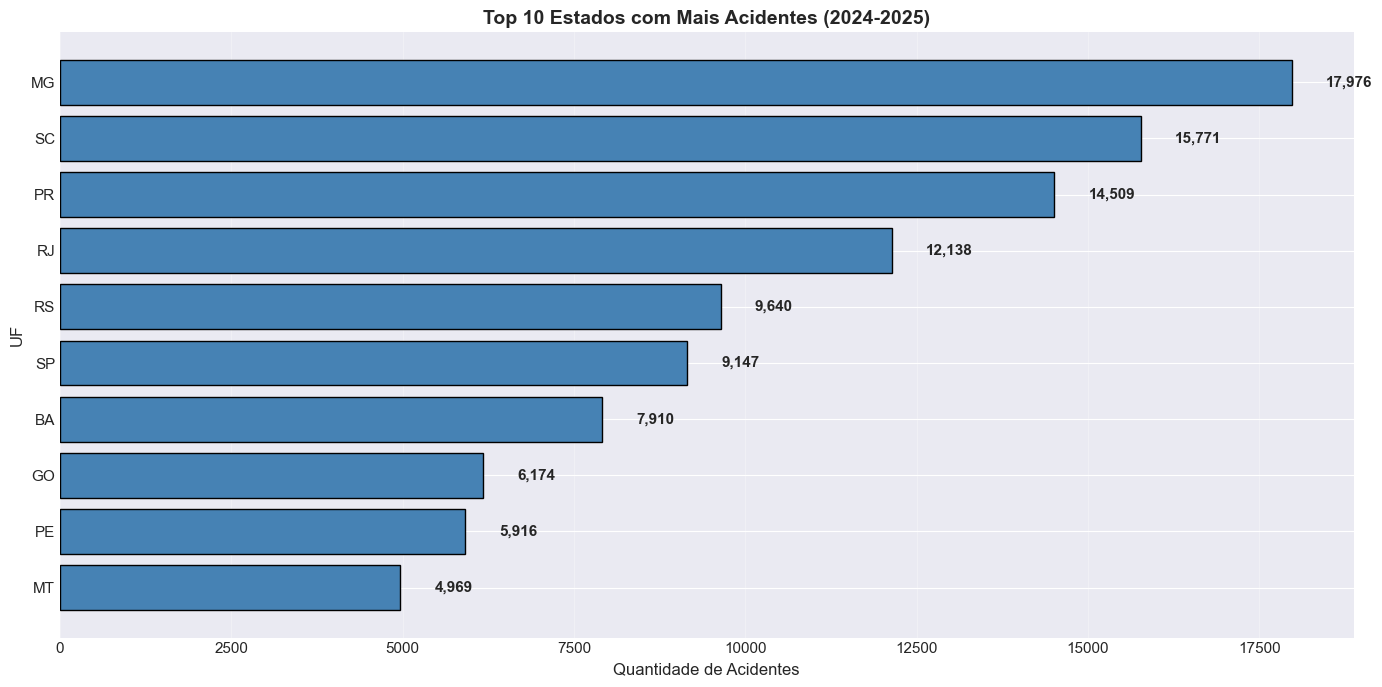

In [23]:
acidentes_uf = df.groupby('uf')['id'].nunique().sort_values(ascending=False).head(10)

# Obter anos disponíveis para o título
anos_disponiveis = sorted(df['ano'].dropna().unique())
primeiro_ano = int(min(anos_disponiveis))
ultimo_ano = int(max(anos_disponiveis))
periodo = f'{primeiro_ano}-{ultimo_ano}' if primeiro_ano != ultimo_ano else str(primeiro_ano)

plt.figure(figsize=(14, 7))
bars = plt.barh(acidentes_uf.index, acidentes_uf.values, color='steelblue', edgecolor='black')

for i, (uf, valor) in enumerate(acidentes_uf.items()):
    plt.text(valor + 500, i, f'{valor:,}', va='center', fontweight='bold')

plt.title(f'Top 10 Estados com Mais Acidentes ({periodo})', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Acidentes', fontsize=12)
plt.ylabel('UF', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Análise 4: Causas de Acidentes - Top 10 causas mais frequentes

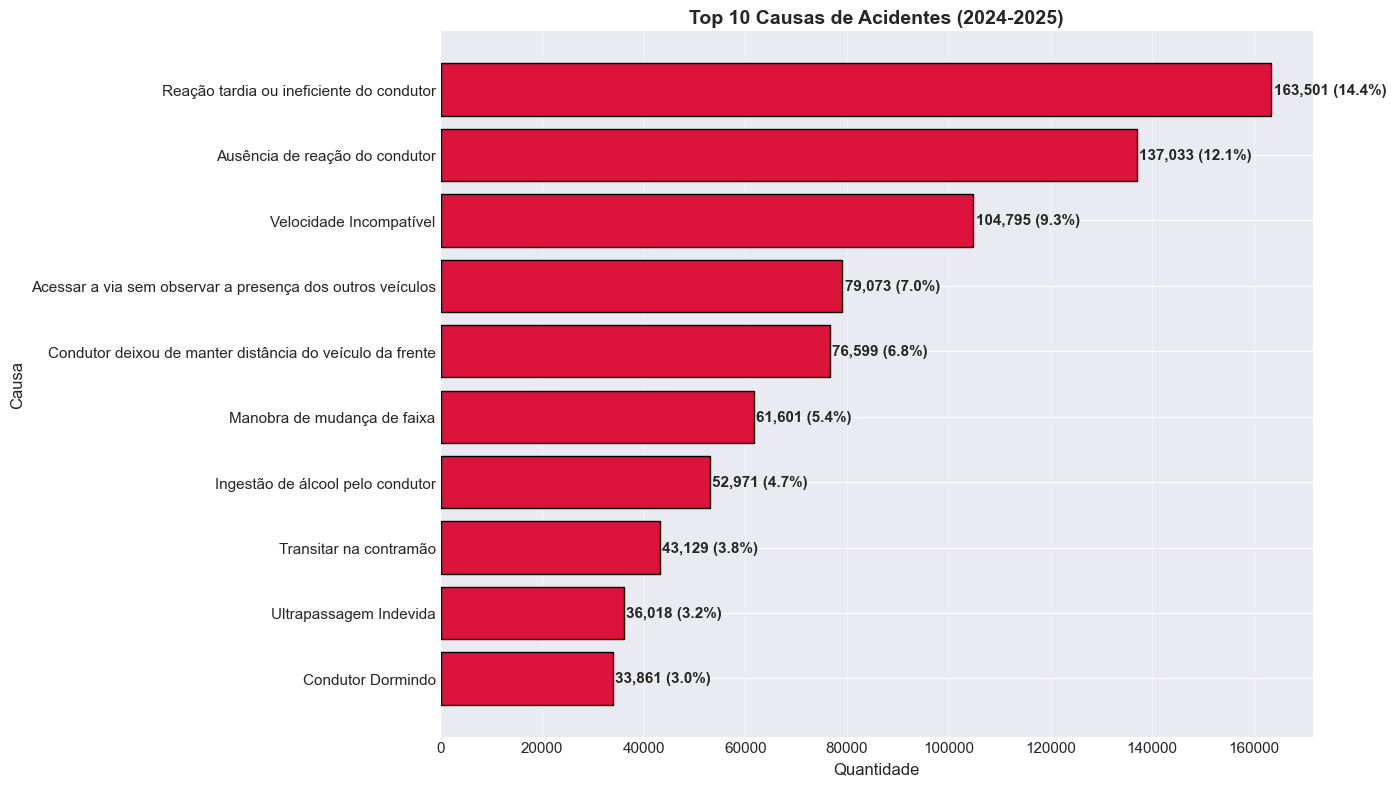

In [24]:
causas = df['causa_acidente'].value_counts().head(10)

# Obter anos disponíveis para o título
anos_disponiveis = sorted(df['ano'].dropna().unique())
primeiro_ano = int(min(anos_disponiveis))
ultimo_ano = int(max(anos_disponiveis))
periodo = f'{primeiro_ano}-{ultimo_ano}' if primeiro_ano != ultimo_ano else str(primeiro_ano)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(causas)), causas.values, color='crimson', edgecolor='black')
plt.yticks(range(len(causas)), causas.index)

for i, valor in enumerate(causas.values):
    plt.text(valor + 500, i, f'{valor:,} ({(valor/len(df)*100):.1f}%)', 
             va='center', fontweight='bold')

plt.title(f'Top 10 Causas de Acidentes ({periodo})', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Causa', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Análise 5: Tipos de Acidentes - Top 10 tipos mais frequentes 

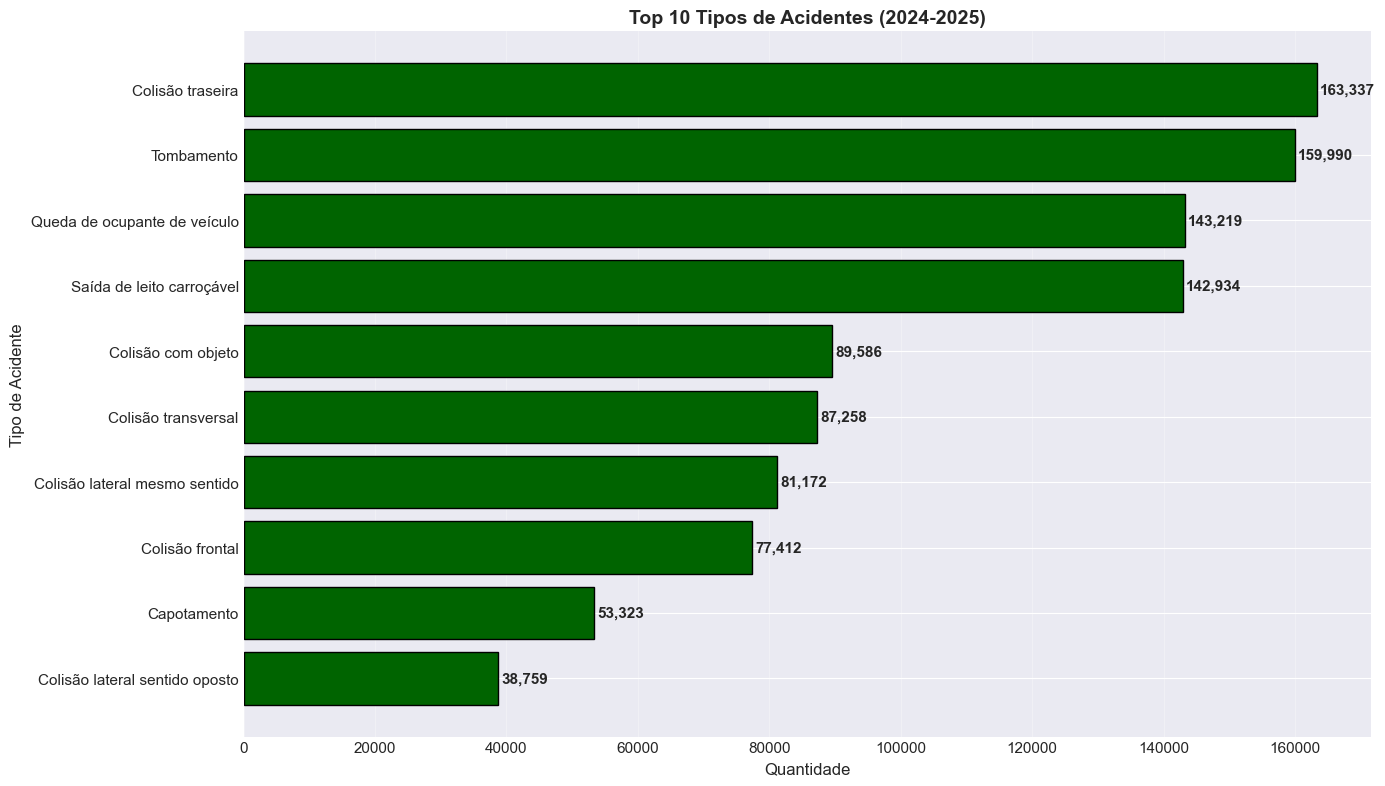

In [25]:
tipos = df['tipo_acidente'].value_counts().head(10)

# Obter anos disponíveis para o título
anos_disponiveis = sorted(df['ano'].dropna().unique())
primeiro_ano = int(min(anos_disponiveis))
ultimo_ano = int(max(anos_disponiveis))
periodo = f'{primeiro_ano}-{ultimo_ano}' if primeiro_ano != ultimo_ano else str(primeiro_ano)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(tipos)), tipos.values, color='darkgreen', edgecolor='black')
plt.yticks(range(len(tipos)), tipos.index)

for i, valor in enumerate(tipos.values):
    plt.text(valor + 500, i, f'{valor:,}', va='center', fontweight='bold')

plt.title(f'Top 10 Tipos de Acidentes ({periodo})', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Tipo de Acidente', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Análise 6: Gravidade - Análise de Vítimas 

Mortos: 55,056 | Feridos Graves: 130,533 | Feridos Leves: 349,029 | Ilesos: 419,413
Total de pessoas envolvidas: 954,031


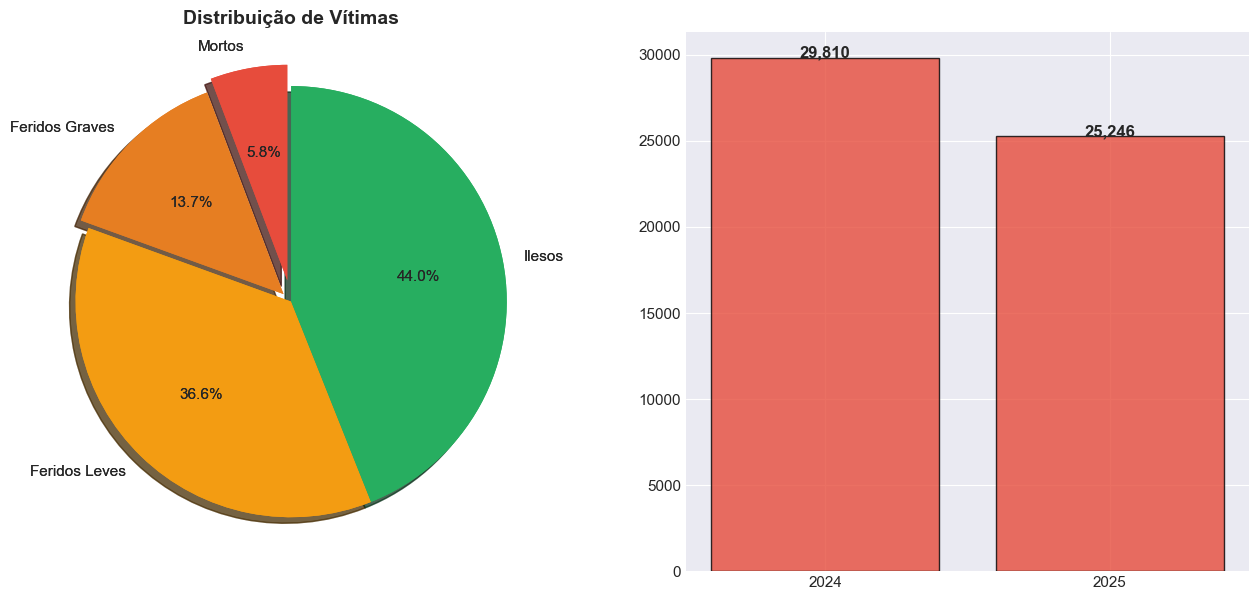

In [26]:
total_mortos = df['mortos'].sum()
total_feridos_graves = df['feridos_graves'].sum()
total_feridos_leves = df['feridos_leves'].sum()
total_ilesos = df['ilesos'].sum()

print(f"Mortos: {total_mortos:,} | Feridos Graves: {total_feridos_graves:,} | Feridos Leves: {total_feridos_leves:,} | Ilesos: {total_ilesos:,}")
print(f"Total de pessoas envolvidas: {total_mortos + total_feridos_graves + total_feridos_leves + total_ilesos:,}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico de pizza
vitimas_data = [total_mortos, total_feridos_graves, total_feridos_leves, total_ilesos]
vitimas_labels = ['Mortos', 'Feridos Graves', 'Feridos Leves', 'Ilesos']
colors = ['#e74c3c', '#e67e22', '#f39c12', '#27ae60']
explode = (0.1, 0.05, 0, 0)

ax1.pie(vitimas_data, labels=vitimas_labels, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True)
vitimas_data = [total_mortos, total_feridos_graves, total_feridos_leves, total_ilesos]
vitimas_labels = ['Mortos', 'Feridos Graves', 'Feridos Leves', 'Ilesos']
colors = ['#e74c3c', '#e67e22', '#f39c12', '#27ae60']
explode = (0.1, 0.05, 0, 0)

ax1.pie(vitimas_data, labels=vitimas_labels, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True)
ax1.set_title('Distribuição de Vítimas', fontsize=14, fontweight='bold')

mortos_ano = df.groupby('ano')['mortos'].sum()
ax2.bar(mortos_ano.index.astype(str), mortos_ano.values, 
        color='#e74c3c', edgecolor='black', alpha=0.8)
for i, (ano, valor) in enumerate(mortos_ano.items()):
    ax2.text(i, valor + 20, f'{valor:,}', ha='center', fontweight='bold', fontsize=12)

### Análise 7: Tipos de Veículos Envolvidos - Top 10 tipos mais frequentes 

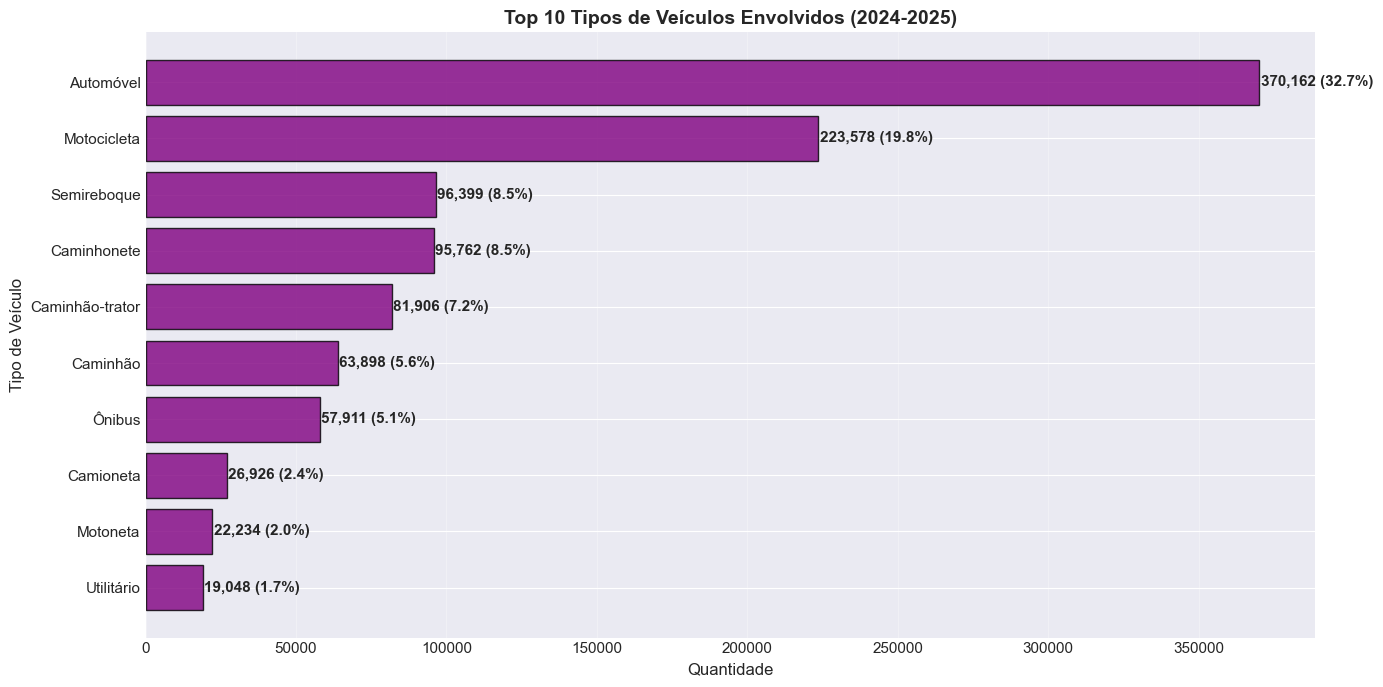

In [27]:
veiculos = df['tipo_veiculo'].value_counts().head(10)

# Obter anos disponíveis para o título
anos_disponiveis = sorted(df['ano'].dropna().unique())
primeiro_ano = int(min(anos_disponiveis))
ultimo_ano = int(max(anos_disponiveis))
periodo = f'{primeiro_ano}-{ultimo_ano}' if primeiro_ano != ultimo_ano else str(primeiro_ano)

plt.figure(figsize=(14, 7))
bars = plt.barh(range(len(veiculos)), veiculos.values, 
                color='purple', edgecolor='black', alpha=0.8)
plt.yticks(range(len(veiculos)), veiculos.index)

for i, valor in enumerate(veiculos.values):
    plt.text(valor + 500, i, f'{valor:,} ({(valor/len(df)*100):.1f}%)', 
             va='center', fontweight='bold')

plt.title(f'Top 10 Tipos de Veículos Envolvidos ({periodo})', 
          fontsize=14, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Tipo de Veículo', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Análise 8: Condições Meteorológicas - Top 10 condições mais frequentes 

,Condição Meteorológica,Quantidade,Percentual (%)
0,CÉU CLARO,706329,62.42
1,NUBLADO,170115,15.03
2,CHUVA,120458,10.64
3,SOL,63014,5.57
4,GAROA/CHUVISCO,45492,4.02
5,IGNORADO,12456,1.1
6,NEVOEIRO/NEBLINA,11949,1.06
7,VENTO,1757,0.16
8,GRANIZO,21,0.0
9,NEVE,4,0.0


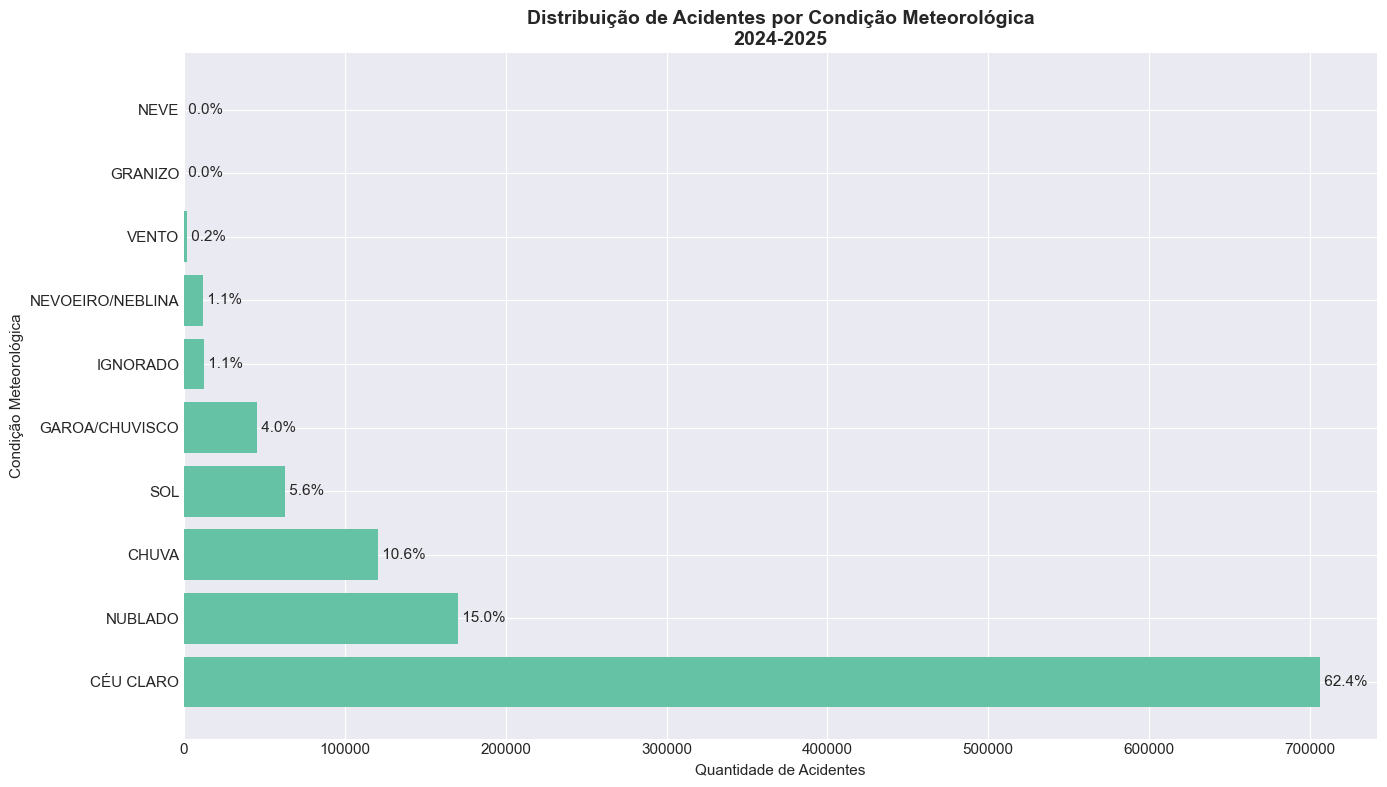

In [28]:
condicoes = df['condicao_metereologica'].fillna('NÃO INFORMADO').str.upper().value_counts()

# Obter anos disponíveis para o título
anos_disponiveis = sorted(df['ano'].dropna().unique())
primeiro_ano = int(min(anos_disponiveis))
ultimo_ano = int(max(anos_disponiveis))
periodo = f'{primeiro_ano}-{ultimo_ano}' if primeiro_ano != ultimo_ano else str(primeiro_ano)

condicoes_df = pd.DataFrame({
    'Condição Meteorológica': condicoes.index,
    'Quantidade': condicoes.values,
    'Percentual (%)': (condicoes.values / len(df) * 100).round(2)
})

display(condicoes_df)

plt.figure(figsize=(14, 8))
bars = plt.barh(condicoes_df['Condição Meteorológica'], condicoes_df['Quantidade'])

plt.title(f'Distribuição de Acidentes por Condição Meteorológica\n{periodo}',
          fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Condição Meteorológica')

for bar, pct in zip(bars, condicoes_df['Percentual (%)']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f' {pct:.1f}%', va='center')

plt.tight_layout()
plt.show()

### Análise 9: Matriz de Correlação - Tipo de Acidente vs Gravidade 

gravidade,Com Mortos,Com Feridos Graves,Com Feridos Leves,Apenas Ilesos,TOTAL
tipo_acidente,,,,,
Capotamento,2947,7027,23362,19987,53323
Colisão com objeto,4650,9664,31555,43717,89586
Colisão frontal,8681,13136,18235,37360,77412
Colisão lateral mesmo sentido,1250,5467,22885,51570,81172
Colisão lateral sentido oposto,1419,3409,7923,26008,38759
Colisão transversal,2192,10596,26434,48036,87258
Colisão traseira,3321,12679,43529,103808,163337
Queda de ocupante de veículo,7406,21539,51687,62587,143219
Saída de leito carroçável,8493,16768,49350,68323,142934


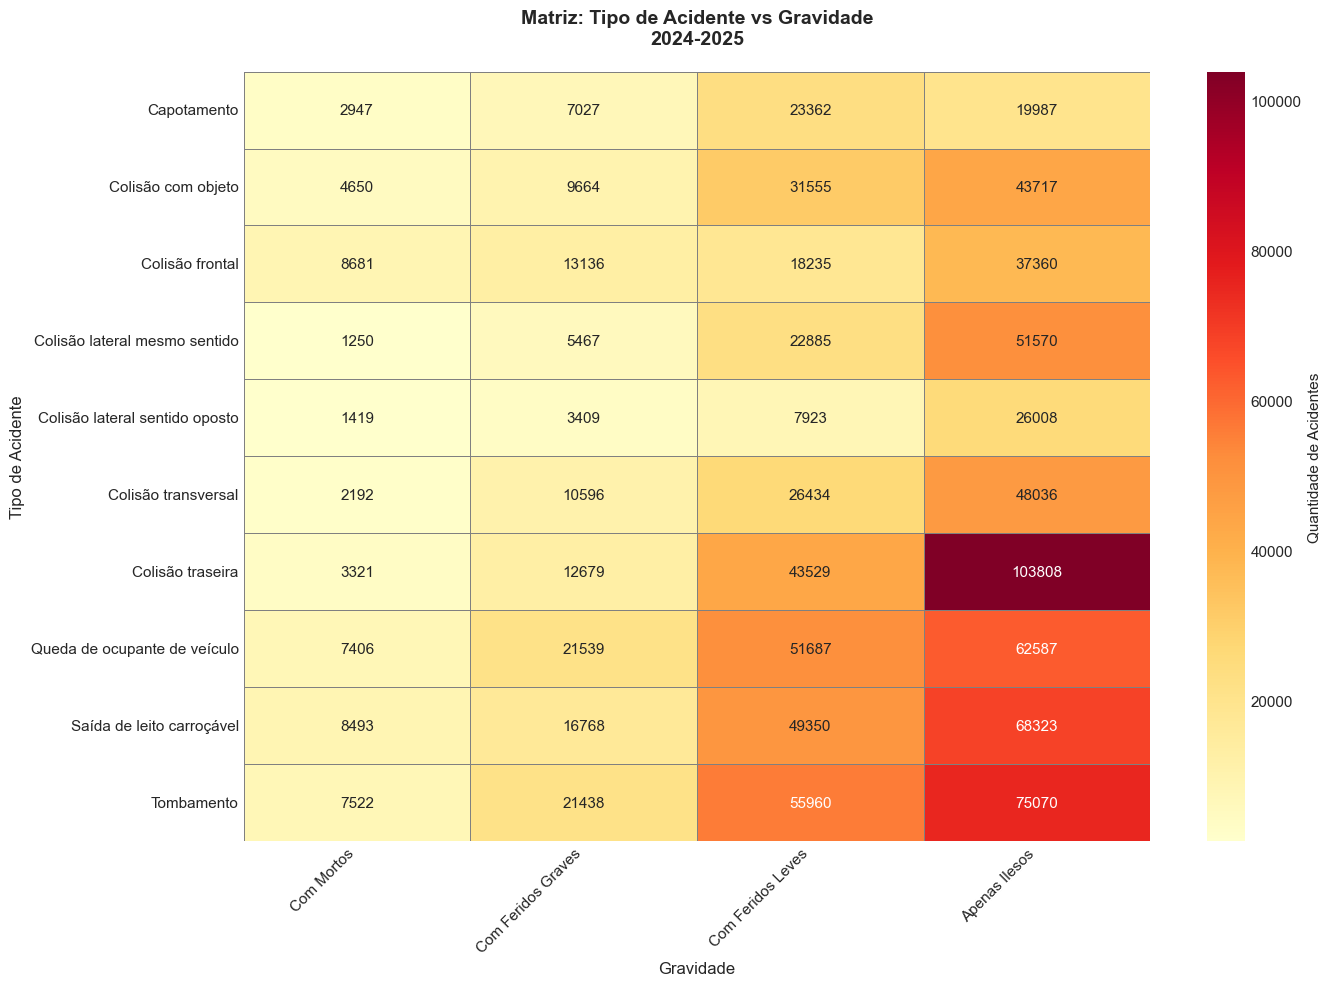

Text(0.5, 1.0, 'Distribuição de Gravidade por Tipo de Acidente (2024-2025)')

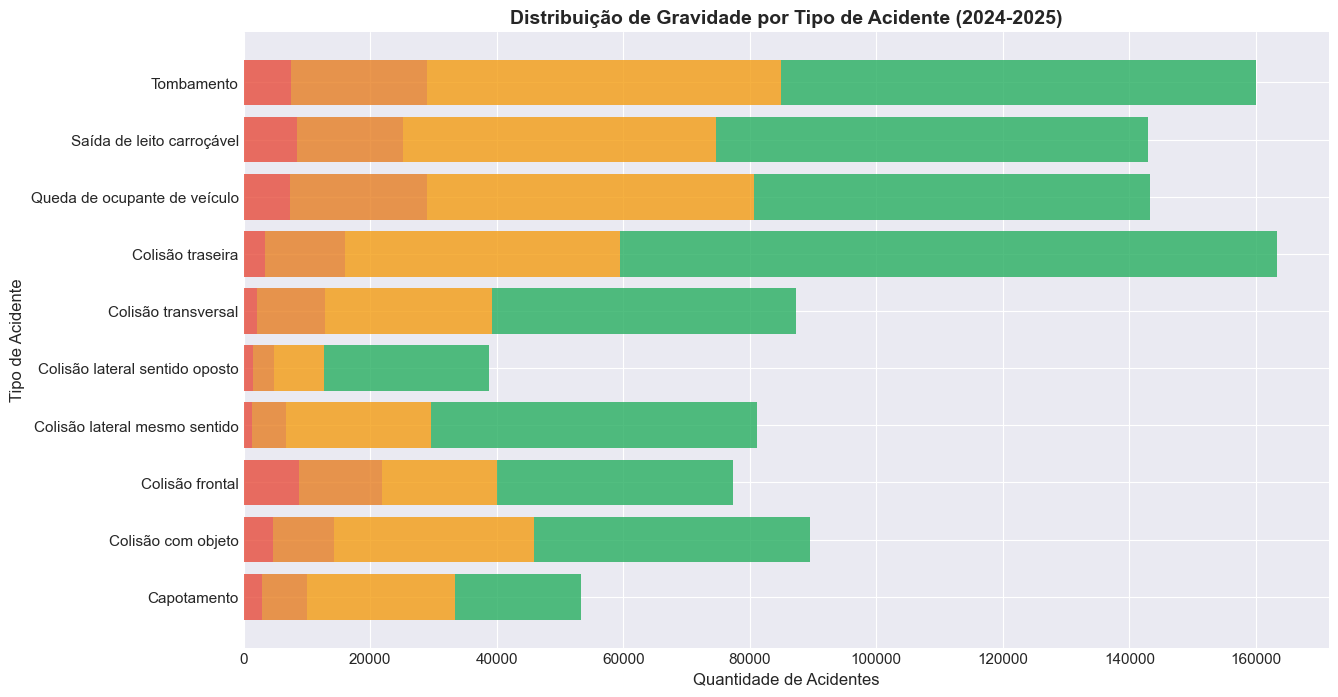

In [29]:
def classificar_gravidade(row):
    if row['mortos'] > 0:
        return 'Com Mortos'
    elif row['feridos_graves'] > 0:
        return 'Com Feridos Graves'
    elif row['feridos_leves'] > 0:
        return 'Com Feridos Leves'
    else:
        return 'Apenas Ilesos'

# Obter anos disponíveis para o título
anos_disponiveis = sorted(df['ano'].dropna().unique())
primeiro_ano = int(min(anos_disponiveis))
ultimo_ano = int(max(anos_disponiveis))
periodo = f'{primeiro_ano}-{ultimo_ano}' if primeiro_ano != ultimo_ano else str(primeiro_ano)

df['gravidade'] = df.apply(classificar_gravidade, axis=1)
top_tipos = df['tipo_acidente'].value_counts().head(10).index
df_matriz = df[df['tipo_acidente'].isin(top_tipos)]

matriz_tipo_gravidade = pd.crosstab(
    df_matriz['tipo_acidente'], 
    df_matriz['gravidade'],
    margins=True,
    margins_name='TOTAL'
)

ordem_colunas = ['Com Mortos', 'Com Feridos Graves', 'Com Feridos Leves', 'Apenas Ilesos']
colunas_existentes = [col for col in ordem_colunas if col in matriz_tipo_gravidade.columns]
outras_colunas = [col for col in matriz_tipo_gravidade.columns 
                  if col not in colunas_existentes and col != 'TOTAL']
colunas_ordenadas = colunas_existentes + outras_colunas
if 'TOTAL' in matriz_tipo_gravidade.columns:
    colunas_ordenadas.append('TOTAL')
matriz_tipo_gravidade = matriz_tipo_gravidade[colunas_ordenadas]

display(matriz_tipo_gravidade)


plt.figure(figsize=(14, 10))
sns.heatmap(matriz_tipo_gravidade.iloc[:-1, :-1], annot=True, fmt='d', 
            cmap='YlOrRd', cbar_kws={'label': 'Quantidade de Acidentes'},
            linewidths=0.5, linecolor='gray')
plt.title(f'Matriz: Tipo de Acidente vs Gravidade\n{periodo}', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Gravidade', fontsize=12)
plt.ylabel('Tipo de Acidente', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(14, 8))
matriz_plot = matriz_tipo_gravidade.iloc[:-1, :-1]

cores_gravidade = {
    'Com Mortos': '#e74c3c',
    'Com Feridos Graves': '#e67e22', 
    'Com Feridos Leves': '#f39c12',
    'Apenas Ilesos': '#27ae60'
}

bottom = np.zeros(len(matriz_plot))
for col in matriz_plot.columns:
    cor = cores_gravidade.get(col, '#3498db')
    ax.barh(matriz_plot.index, matriz_plot[col], left=bottom, 
            label=col, color=cor, alpha=0.8)
    bottom += matriz_plot[col].values

ax.set_xlabel('Quantidade de Acidentes', fontsize=12)
ax.set_ylabel('Tipo de Acidente', fontsize=12)
ax.set_title(f'Distribuição de Gravidade por Tipo de Acidente ({periodo})', 
             fontsize=14, fontweight='bold')

### Análise 10: Heatmap - Distribuição Temporal por UF 

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
uf,,,,,,,,,,,,
MG,14497,10699,13263,11760,12294,12160,16714,13794,13183,14002,13566,9492
PR,11560,10728,10907,12117,13079,11096,11886,11730,11973,11719,12471,6546
SC,9355,9173,8015,9149,9079,8292,9324,8374,8338,8757,9010,4650
RS,6969,6342,6387,6072,5853,6097,6287,6453,6326,6026,6089,3153
BA,6027,5250,4969,5495,5931,6037,6711,5664,4786,6139,5065,3504
SP,5655,5038,5045,5562,5172,4855,5633,5811,5758,5779,5880,2641
RJ,5012,4985,5029,4931,5733,5580,4844,5663,5918,5553,5587,2878
GO,5260,4211,4315,4327,5924,4881,5305,4666,4932,5231,3824,5638
MT,4285,3699,3580,4433,4254,4546,5094,3817,3729,4049,4718,1763


Text(0.5, 63.583333333333314, 'Mês')

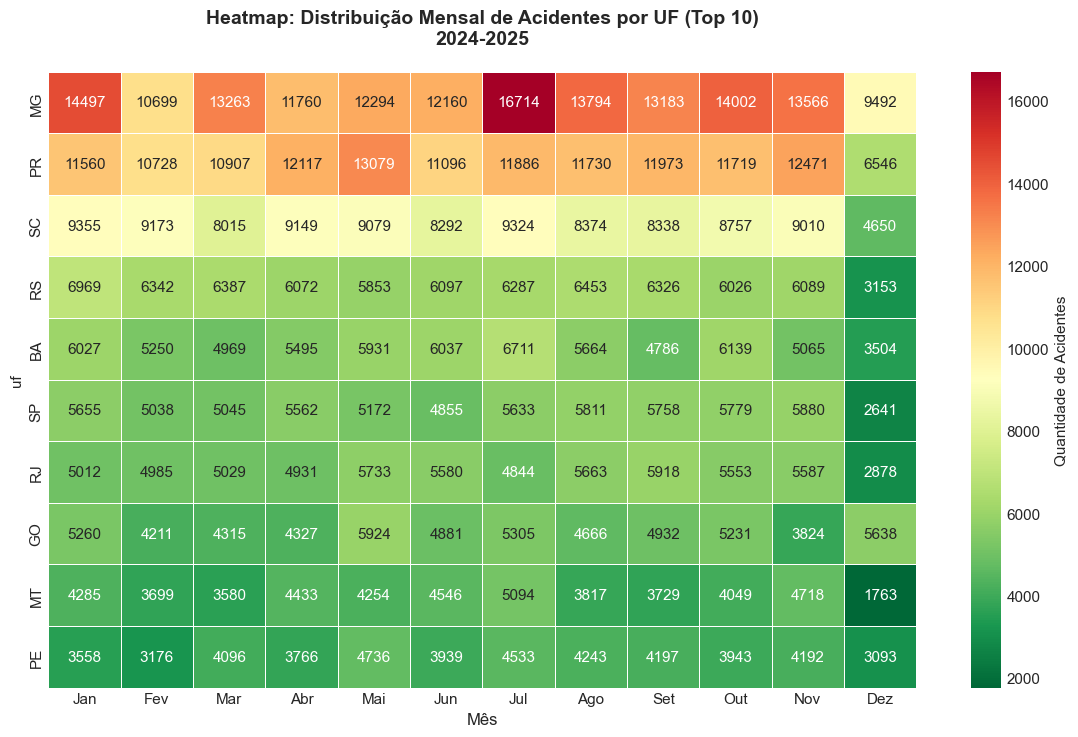

In [30]:
top_10_ufs = df['uf'].value_counts().head(10).index
df_top_ufs = df[df['uf'].isin(top_10_ufs)].copy()

# Obter anos disponíveis para o título
anos_disponiveis = sorted(df['ano'].dropna().unique())
primeiro_ano = int(min(anos_disponiveis))
ultimo_ano = int(max(anos_disponiveis))
periodo = f'{primeiro_ano}-{ultimo_ano}' if primeiro_ano != ultimo_ano else str(primeiro_ano)

heatmap_uf_mes = pd.crosstab(df_top_ufs['uf'], df_top_ufs['mes'])
heatmap_uf_mes['Total'] = heatmap_uf_mes.sum(axis=1)
heatmap_uf_mes = heatmap_uf_mes.sort_values('Total', ascending=False)
heatmap_uf_mes = heatmap_uf_mes.drop('Total', axis=1)

meses_nomes = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
               7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
heatmap_uf_mes.columns = [meses_nomes.get(col, col) for col in heatmap_uf_mes.columns]

display(heatmap_uf_mes)


plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_uf_mes,
    annot=True,
    fmt='d',
    cmap='RdYlGn_r',  # Vermelho (alto) -> Amarelo -> Verde (baixo)
    cbar_kws={'label': 'Quantidade de Acidentes'},
    linewidths=0.5,
    linecolor='white'
)
plt.title(f'Heatmap: Distribuição Mensal de Acidentes por UF (Top 10)\n{periodo}', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Mês', fontsize=12)

### Análise 11: Distribuição de Idade dos Envolvidos 

**Nota:** Valores não informados (NA) são representados como -1 para visualização na camada RAW.

Total de registros: 1,131,595
Não informados (idade = -1): 205,819 (18.2%)
Outliers (idade > 200): 1,145

Estatísticas (excluindo -1 e outliers):
  Mínima: 0
  Máxima: 127
  Média: 38.9
  Mediana: 38


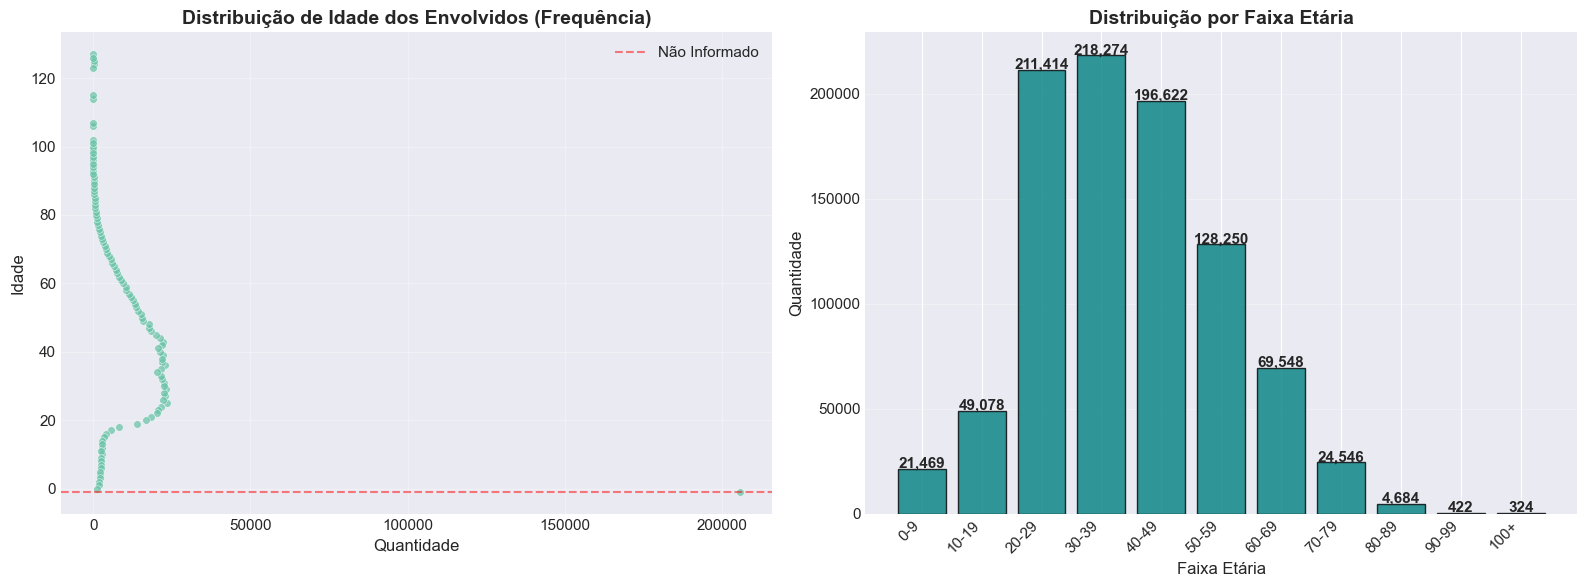

In [31]:
df_idade = df[['idade']].copy()
df_idade['idade'] = pd.to_numeric(df_idade['idade'], errors='coerce').fillna(-1).astype(int)

idade_stats = df_idade['idade'].describe()
qtd_nao_informado = (df_idade['idade'] == -1).sum()
qtd_outliers = ((df_idade['idade'] > 200) & (df_idade['idade'] != -1)).sum()

print(f"Total de registros: {len(df_idade):,}")
print(f"Não informados (idade = -1): {qtd_nao_informado:,} ({qtd_nao_informado/len(df_idade)*100:.1f}%)")
print(f"Outliers (idade > 200): {qtd_outliers:,}")
print(f"\nEstatísticas (excluindo -1 e outliers):")
df_idade_valido = df_idade[(df_idade['idade'] >= 0) & (df_idade['idade'] <= 200)]
print(f"  Mínima: {df_idade_valido['idade'].min()}")
print(f"  Máxima: {df_idade_valido['idade'].max()}")
print(f"  Média: {df_idade_valido['idade'].mean():.1f}")
print(f"  Mediana: {df_idade_valido['idade'].median():.0f}")

df_idade_tratado = df_idade[df_idade['idade'] <= 200]
contagem_idade = df_idade_tratado['idade'].value_counts()
df_plot_frequencia = contagem_idade.reset_index()
df_plot_frequencia.columns = ['idade', 'quantidade']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df_plot_frequencia, x='quantidade', y='idade', 
                s=30, alpha=0.7, ax=ax1)
ax1.set_title('Distribuição de Idade dos Envolvidos (Frequência)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Quantidade', fontsize=12)
ax1.set_ylabel('Idade', fontsize=12)
ax1.ticklabel_format(style='plain', axis='x')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=-1, color='red', linestyle='--', alpha=0.5, label='Não Informado')
ax1.legend()

faixas_etarias = pd.cut(df_idade_valido['idade'], 
                        bins=[-0.1, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 10000],
                        labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', 
                                '60-69', '70-79', '80-89', '90-99', '100+'])
contagem_faixas = faixas_etarias.value_counts().sort_index()

ax2.bar(range(len(contagem_faixas)), contagem_faixas.values, 
        color='teal', edgecolor='black', alpha=0.8)
ax2.set_xticks(range(len(contagem_faixas)))
ax2.set_xticklabels(contagem_faixas.index, rotation=45, ha='right')
ax2.set_title('Distribuição por Faixa Etária', fontsize=14, fontweight='bold')
ax2.set_xlabel('Faixa Etária', fontsize=12)
ax2.set_ylabel('Quantidade', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

for i, valor in enumerate(contagem_faixas.values):
    ax2.text(i, valor + 500, f'{valor:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()